######################################################################################################
# STAGE 1 - Analysis for 3 classes, numeric AND title+content
######################################################################################################


In [ ]:

##########################
## STAGE 1 - Analysis for 3 classes, numeric AND title+content
##########################

##  We kept all three labels for the classification modeling:
# 0: articles from reliable sources
# 1: articles from unreliable sources
# 2: articles from mixed sources


# USED PRE-PROCESSED DATASET FOR MODELING: strats6_all_cleaned.pkl
# LOAD AS DF6
# --> contains 85.051 rows after pre-processing (3 classes)

# 0.0    36636
# 1.0    26542
# 2.0    21873


#########
# Pre-Processing Steps:
# Create dataframe with numeric variables only
# standardize this dataframe for some of the models to run properly
# vectorize text (TF-IDF)
#########



# We ran multiple models on 2 different aspects of our dataset:

# ASPECT 1: NUMERIC DATA (need for pre-processing and standardization of data for some models)
# ASPECT 2: TITLE + CONTENT DATA ONLY (with TF-IDF vectorization)

# We chose a variety of initial models and compared the results. We focused on accuracy, f1-score and the confusion matrix as main evaluation metrics.


## MODELS FOR STAGE 1 (Basic Models):
# 1) Naive Bayes Bernoulli
# 2) Naive Bayes Multinomial
# 3) Naive Bayes Complement
# 4) Logistic Regression




# Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import seaborn as sns
# from sqlalchemy import create_engine
# import sqlalchemy as 
import sqlite3
import nltk
from nltk.tokenize import word_tokenize


# Load dataset

In [2]:
df6 = pd.read_pickle("strats6_all_cleaned.pkl")

In [3]:
df6.head(2)

,id,source,title,content,url,published_utc,year,month,dayofyear,dayofthemonth,...,Israel,Japan,Kenya,Macedonia,Netherlands,Qatar,Russia,USA,United Kingdom,Unknown
0,21stcenturywire--2022-04-26--An Unsettling Rea...,21stcenturywire,An Unsettling Realization: ‘Mask Zealots are S...,It’s been noted how the fanatical nature of ma...,https://21stcenturywire.com/2022/04/26/an-unse...,1650983484,2022,4,116,26,...,0,0,0,0,0,0,0,1,0,0
1,21stcenturywire--2022-04-24--Episode #416 – ‘S...,21stcenturywire,Episode #416 – ‘Soldiers of Fortune’ with gues...,Episode #416 of SUNDAY WIRE SHOW resumes this ...,https://21stcenturywire.com/2022/04/24/episode...,1650823248,2022,4,114,24,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85051 entries, 0 to 106709
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        85051 non-null  object 
 1   source                    85051 non-null  object 
 2   title                     85051 non-null  object 
 3   content                   85051 non-null  object 
 4   url                       85051 non-null  object 
 5   published_utc             85051 non-null  int64  
 6   year                      85051 non-null  int64  
 7   month                     85051 non-null  int64  
 8   dayofyear                 85051 non-null  int64  
 9   dayofthemonth             85051 non-null  int64  
 10  weekday                   85051 non-null  int64  
 11  weekend                   85051 non-null  int32  
 12  label                     85051 non-null  float64
 13  factuality                85051 non-null  float64
 14  quest

In [5]:
# inspect labels
df6["label"].value_counts()

# slightly unbalanced

# 0.0    36636
# 1.0    26542
# 2.0    21873


0.0    36636
1.0    26542
2.0    21873
Name: label, dtype: int64

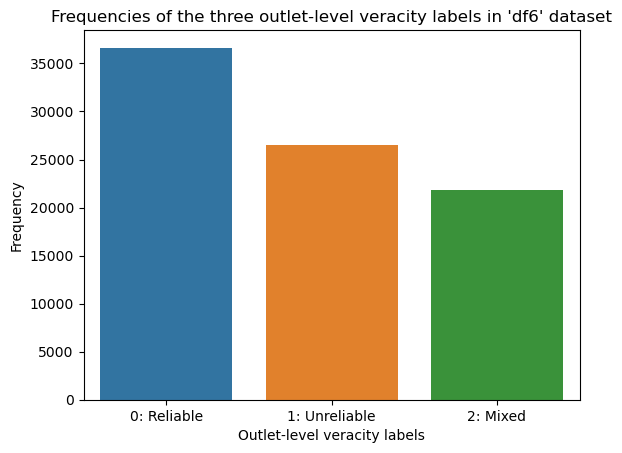

In [6]:
# barplot of labels
sns.countplot(x = "label", data = df6)
plt.xticks(np.arange(3),["0: Reliable", "1: Unreliable", "2: Mixed"])
plt.ylabel("Frequency")
plt.xlabel("Outlet-level veracity labels")
plt.title("Frequencies of the three outlet-level veracity labels in 'df6' dataset")
plt.show();


# Numeric Data

## CREATE NUMERIC DATASETS df_num

## x_train, x_test, y_train, y_test (lower case x and y)


In [7]:
df_num = df6.select_dtypes(exclude=['object'])
print(df_num)


        published_utc  year  month  dayofyear  dayofthemonth  weekday  \
0          1650983484  2022      4        116             26        1   
1          1650823248  2022      4        114             24        6   
2          1657916785  2022      7        196             15        4   
3          1653236268  2022      5        142             22        6   
4          1647044296  2022      3         70             11        4   
...               ...   ...    ...        ...            ...      ...   
106705     1665142200  2022     10        280              7        4   
106706     1660253100  2022      8        223             11        3   
106707     1655742000  2022      6        171             20        0   
106708     1642390200  2022      1         16             16        6   
106709     1664605800  2022     10        274              1        5   

        weekend  label  factuality  questionable-source  ...  Israel  Japan  \
0             0    1.0         2.0          

In [8]:
# DEFINE x and y
x = df_num.drop(["label"], axis = 1)
y = df6["label"]


In [9]:
x.head(3)

,published_utc,year,month,dayofyear,dayofthemonth,weekday,weekend,factuality,questionable-source,conspiracy-pseudoscience,...,Israel,Japan,Kenya,Macedonia,Netherlands,Qatar,Russia,USA,United Kingdom,Unknown
0,1650983484,2022,4,116,26,1,0,2.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
1,1650823248,2022,4,114,24,6,1,2.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,1657916785,2022,7,196,15,4,0,2.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
x.dtypes

published_utc                 int64
year                          int64
month                         int64
dayofyear                     int64
dayofthemonth                 int64
weekday                       int64
weekend                       int32
factuality                  float64
questionable-source         float64
conspiracy-pseudoscience    float64
pro-science                 float64
word_count_content            int64
word_count_title              int64
tok_content_length            int64
tok_title_length              int64
nb_character_content          int64
nb_character_title            int64
Australia                     uint8
Bulgaria                      uint8
Canada                        uint8
Cyprus                        uint8
France                        uint8
Germany                       uint8
Ireland                       uint8
Israel                        uint8
Japan                         uint8
Kenya                         uint8
Macedonia                   

In [11]:
y.head(3)

0    1.0
1    1.0
2    1.0
Name: label, dtype: float64

In [12]:
# Split the dataset:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)


# 1 Create Naive Bayes Bernoulli Model on numeric data

In [13]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
# Create a Bernoulli Naive Bayes classifier
clf_Bern_df6 = BernoulliNB()


In [15]:
# Train the classifier
clf_Bern_df6.fit(x_train, y_train)


BernoulliNB()

In [16]:
y_pred_Bern_df6 = clf_Bern_df6.predict(x_test)


In [17]:
# Evaluate the model
accuracyNB_Bernoulli_df6 = accuracy_score(y_test, y_pred_Bern_df6)
print("Accuracy:", accuracyNB_Bernoulli_df6)

# 0.77


Accuracy: 0.7734995003233202


In [18]:
# get confusion matrix
pd.crosstab(y_test, y_pred_Bern_df6, rownames=["true"], colnames=["predict"])

# looks ok
# perfect for fake news

predict,0.0,1.0,2.0
real,,,
0.0,5752,121,1482
1.0,0,5251,0
2.0,2247,3,2155


In [19]:
# Evaluate model with classification report
from sklearn.metrics import classification_report 

print("Naive Bayes Bernoulli classification report df6:\n", classification_report (y_test, y_pred_Bern_df6))

# looks ok

Naive Bayes Bernoulli classification report df6:
               precision    recall  f1-score   support

         0.0       0.72      0.78      0.75      7355
         1.0       0.98      1.00      0.99      5251
         2.0       0.59      0.49      0.54      4405

    accuracy                           0.77     17011
   macro avg       0.76      0.76      0.76     17011
weighted avg       0.77      0.77      0.77     17011



In [20]:
# Evaluate Model with confusion matrix 
from sklearn.metrics import confusion_matrix 

conf_matrix_Bern_df6 = confusion_matrix(y_test, y_pred_Bern_df6)

print("Confusion Matrix:\n",  conf_matrix_Bern_df6)


Confusion Matrix:
 [[5752  121 1482]
 [   0 5251    0]
 [2247    3 2155]]


# 2 Create Naive Bayes Multinomial on numeric data

In [21]:
from sklearn.naive_bayes import MultinomialNB
clf_mult_df6 = MultinomialNB()


In [22]:
clf_mult_df6.fit(x_train, y_train)


MultinomialNB()

In [23]:
# get accuracy
accuracyNB_Multinomial_df6 = clf_mult_df6.score(x_test, y_test)
accuracyNB_Multinomial_df6

# 0.33


0.3325495267767915

In [24]:
# get confusion matrix
y_pred_NB_Multinomial_df6 = clf_mult_df6.predict(x_test)
pd.crosstab(y_test, y_pred_NB_Multinomial_df6, rownames=["true"], colnames=["predict"])

# worse than Bernoulli

predict,0.0,1.0,2.0
real,,,
0.0,427,4480,2448
1.0,210,3549,1492
2.0,229,2495,1681


In [25]:
from sklearn.metrics import classification_report 

# get classification report
print("Naive Bayes Multinomial classification report df6:\n ", classification_report (y_test, y_pred_NB_Multinomial_df6))


Naive Bayes Multinomial classification report df6:
                precision    recall  f1-score   support

         0.0       0.49      0.06      0.10      7355
         1.0       0.34      0.68      0.45      5251
         2.0       0.30      0.38      0.34      4405

    accuracy                           0.33     17011
   macro avg       0.38      0.37      0.30     17011
weighted avg       0.39      0.33      0.27     17011



In [26]:
# create confusion matrix
cf_matrix_Multinomial_df6 = confusion_matrix(y_test, y_pred_NB_Multinomial_df6)
print(cf_matrix_Multinomial_df6)


[[ 427 4480 2448]
 [ 210 3549 1492]
 [ 229 2495 1681]]


# 3 Create Naive Bayes Complement on numeric data

In [27]:
from sklearn.naive_bayes import ComplementNB
clf_compl_df6 = ComplementNB()


In [28]:
clf_compl_df6.fit(x_train, y_train)


ComplementNB()

In [29]:
# get accuracy
accuracyNB_Complement_df6 = clf_compl_df6.score(x_test, y_test)
accuracyNB_Complement_df6

# 0.327


0.3272000470283934

In [30]:
# get confusion matrix
y_pred_NB_Complement_df6 = clf_compl_df6.predict(x_test)
pd.crosstab(y_test, y_pred_NB_Complement_df6, rownames=["true"], colnames=["predict"])

# worse than model before

predict,0.0,1.0,2.0
real,,,
0.0,77,4682,2596
1.0,7,3724,1520
2.0,11,2629,1765


In [31]:
from sklearn.metrics import classification_report 

# get classification report
print("Naive Bayes Complement classification report df6:\n ", classification_report (y_test, y_pred_NB_Complement_df6))


Naive Bayes Complement classification report df6:
                precision    recall  f1-score   support

         0.0       0.81      0.01      0.02      7355
         1.0       0.34      0.71      0.46      5251
         2.0       0.30      0.40      0.34      4405

    accuracy                           0.33     17011
   macro avg       0.48      0.37      0.27     17011
weighted avg       0.53      0.33      0.24     17011



In [32]:
# create confusion matrix
cf_matrix_Complement_df6 = confusion_matrix(y_test, y_pred_NB_Complement_df6)
print(cf_matrix_Complement_df6)


[[  77 4682 2596]
 [   7 3724 1520]
 [  11 2629 1765]]


# CREATE SCALED DATASET

In [42]:
# Logistic Regression need standardisation


In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [52]:
cols = x_train.columns

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=cols)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=cols)


In [53]:
x_train_scaled

,published_utc,year,month,dayofyear,dayofthemonth,weekday,weekend,factuality,questionable-source,conspiracy-pseudoscience,...,Israel,Japan,Kenya,Macedonia,Netherlands,Qatar,Russia,USA,United Kingdom,Unknown
0,0.236385,0.0,0.138142,0.238484,1.280930,-0.413892,-0.531249,1.330124,-0.500620,-0.356074,...,-0.063354,-0.014849,-0.012124,-0.036394,-0.00664,-0.101661,-0.263741,0.743329,-0.502525,-0.138632
1,0.410721,0.0,0.430322,0.410803,-0.203178,1.685848,1.882357,1.330124,-0.500620,-0.356074,...,-0.063354,-0.014849,-0.012124,-0.036394,-0.00664,-0.101661,-0.263741,-1.345299,1.989951,-0.138632
2,0.129979,0.0,0.138142,0.133177,0.025146,1.160913,1.882357,-0.339294,-0.500620,-0.356074,...,-0.063354,-0.014849,-0.012124,-0.036394,-0.00664,-0.101661,-0.263741,0.743329,-0.502525,-0.138632
3,-0.689343,0.0,-0.738400,-0.690127,0.595957,0.111043,-0.531249,-1.174003,-0.500620,2.808407,...,-0.063354,-0.014849,-0.012124,-0.036394,-0.00664,-0.101661,-0.263741,0.743329,-0.502525,-0.138632
4,-0.270465,0.0,-0.154039,-0.268902,-1.344800,1.160913,1.882357,-0.339294,-0.500620,-0.356074,...,-0.063354,-0.014849,-0.012124,-0.036394,-0.00664,-0.101661,-0.263741,-1.345299,1.989951,-0.138632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68035,1.102156,0.0,1.014684,1.100082,1.052606,-0.938827,-0.531249,0.495415,-0.500620,-0.356074,...,-0.063354,-0.014849,-0.012124,-0.036394,-0.00664,-0.101661,-0.263741,0.743329,-0.502525,-0.138632
68036,-0.289386,0.0,-0.154039,-0.288048,-1.573124,0.111043,-0.531249,-1.174003,-0.500620,2.808407,...,-0.063354,-0.014849,-0.012124,-0.036394,-0.00664,-0.101661,-0.263741,-1.345299,-0.502525,-0.138632
68037,0.016456,0.0,0.138142,0.018298,-1.344800,-1.463761,-0.531249,1.330124,-0.500620,-0.356074,...,-0.063354,-0.014849,-0.012124,-0.036394,-0.00664,-0.101661,-0.263741,0.743329,-0.502525,-0.138632
68038,-0.207708,0.0,-0.154039,-0.211462,-0.659827,0.635978,-0.531249,-0.339294,1.997523,-0.356074,...,-0.063354,-0.014849,-0.012124,-0.036394,-0.00664,-0.101661,-0.263741,0.743329,-0.502525,-0.138632


In [54]:
x_test_scaled

,published_utc,year,month,dayofyear,dayofthemonth,weekday,weekend,factuality,questionable-source,conspiracy-pseudoscience,...,Israel,Japan,Kenya,Macedonia,Netherlands,Qatar,Russia,USA,United Kingdom,Unknown
0,-1.318544,0.0,-1.322762,-1.321966,-0.203178,-1.463761,-0.531249,1.330124,-0.500620,-0.356074,...,-0.063354,-0.014849,-0.012124,-0.036394,-0.00664,-0.101661,-0.263741,0.743329,-0.502525,-0.138632
1,-0.041297,0.0,-0.154039,-0.039142,1.395092,-0.938827,-0.531249,-0.339294,-0.500620,-0.356074,...,-0.063354,-0.014849,-0.012124,-0.036394,-0.00664,-0.101661,-0.263741,-1.345299,1.989951,-0.138632
2,1.171116,0.0,1.306864,1.176668,-1.573124,-0.413892,-0.531249,-0.339294,-0.500620,-0.356074,...,-0.063354,-0.014849,-0.012124,-0.036394,-0.00664,-0.101661,-0.263741,0.743329,-0.502525,-0.138632
3,0.095633,0.0,0.138142,0.094884,-0.431502,-0.938827,-0.531249,0.495415,-0.500620,-0.356074,...,-0.063354,-0.014849,-0.012124,-0.036394,-0.00664,-0.101661,-0.263741,-1.345299,1.989951,-0.138632
4,-0.690574,0.0,-0.738400,-0.690127,0.595957,0.111043,-0.531249,1.330124,-0.500620,-0.356074,...,-0.063354,-0.014849,-0.012124,-0.036394,-0.00664,-0.101661,-0.263741,0.743329,-0.502525,-0.138632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17006,-1.090491,0.0,-1.030581,-1.092206,-0.659827,0.111043,-0.531249,-0.339294,-0.500620,-0.356074,...,-0.063354,-0.014849,-0.012124,-0.036394,-0.00664,-0.101661,-0.263741,0.743329,-0.502525,-0.138632
17007,0.017167,0.0,0.138142,0.018298,-1.344800,-1.463761,-0.531249,-2.008711,1.997523,-0.356074,...,-0.063354,-0.014849,-0.012124,-0.036394,-0.00664,-0.101661,3.791605,-1.345299,-0.502525,-0.138632
17008,-1.319128,0.0,-1.322762,-1.321966,-0.203178,-1.463761,-0.531249,0.495415,-0.500620,-0.356074,...,-0.063354,-0.014849,-0.012124,-0.036394,-0.00664,-0.101661,-0.263741,0.743329,-0.502525,-0.138632
17009,-0.842215,0.0,-0.738400,-0.843300,-1.230638,-0.938827,-0.531249,1.330124,-0.500620,-0.356074,...,-0.063354,-0.014849,-0.012124,-0.036394,-0.00664,-0.101661,-0.263741,0.743329,-0.502525,-0.138632


# 4 LOGISTIC REGRESSION ON SCALED DATA / numeric data

In [ ]:
# Logistic Regression - needs standardization


In [55]:
# Step 3: Instantiate model 
from sklearn.linear_model import LogisticRegression

clf_LogReg_df6 = LogisticRegression(C=1.0)


In [56]:
# Step 4: Fit the model on the training dataset
clf_LogReg_df6.fit(x_train_scaled, y_train)


C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
# get accuracy
accuracy_logReg_df6 = clf_LogReg_df6.score(x_test_scaled, y_test)
accuracy_logReg_df6

# 0.94


0.9448592087472811

In [58]:
# get confusion matrix
y_pred_LogReg_df6 = clf_LogReg_df6.predict(x_test_scaled)
pd.crosstab(y_test, y_pred_LogReg_df6, rownames=["true"], colnames=["predict"])

# 100% perfect prediction for fake news


predict,0.0,1.0,2.0
real,,,
0.0,6456,0,899
1.0,0,5251,0
2.0,39,0,4366


In [59]:
from sklearn.metrics import classification_report 

# get classification report
print("Logistic Regression classification report df6:\n ", classification_report (y_test, y_pred_LogReg_df6))


Logistic Regression classification report df6:
                precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      7355
         1.0       1.00      1.00      1.00      5251
         2.0       0.83      0.99      0.90      4405

    accuracy                           0.94     17011
   macro avg       0.94      0.96      0.95     17011
weighted avg       0.95      0.94      0.95     17011



In [60]:
# create confusion matrix
cf_matrix_LogReg_df6 = confusion_matrix(y_test, y_pred_LogReg_df6)
print(cf_matrix_LogReg_df6)

# 100% accuracy for fake news!


[[6456    0  899]
 [   0 5251    0]
 [  39    0 4366]]


# COMPARE MODELS ON NUMERIC DATA ONLY


In [110]:
print("Naive Bayes Bernoulli accuracy score df6:", accuracyNB_Bernoulli_df6)
print("Naive Bayes Multinomial accuracy score df6:", accuracyNB_Multinomial_df6)
print("Naive Bayes Complement accuracy score df6 :", accuracyNB_Complement_df6)
print("Logistic Regression accuracy score df6:", accuracy_logReg_df6)


Naive Bayes Bernoulli accuracy score df6: 0.7734995003233202
Naive Bayes Multinomial accuracy score df6: 0.3325495267767915
Naive Bayes Complement accuracy score df6 : 0.3272000470283934
Logistic Regression accuracy score df6: 0.9448592087472811


In [111]:
#Creating the Dictionary with model name as key adn accuracy as key-value
labels={'Naive Bayes Bernoulli':accuracyNB_Bernoulli_df6,
        'Naive Bayes Multinomial':accuracyNB_Multinomial_df6,
        'Naive Bayes Complement':accuracyNB_Complement_df6,
        'Logistic Regression':accuracy_logReg_df6}


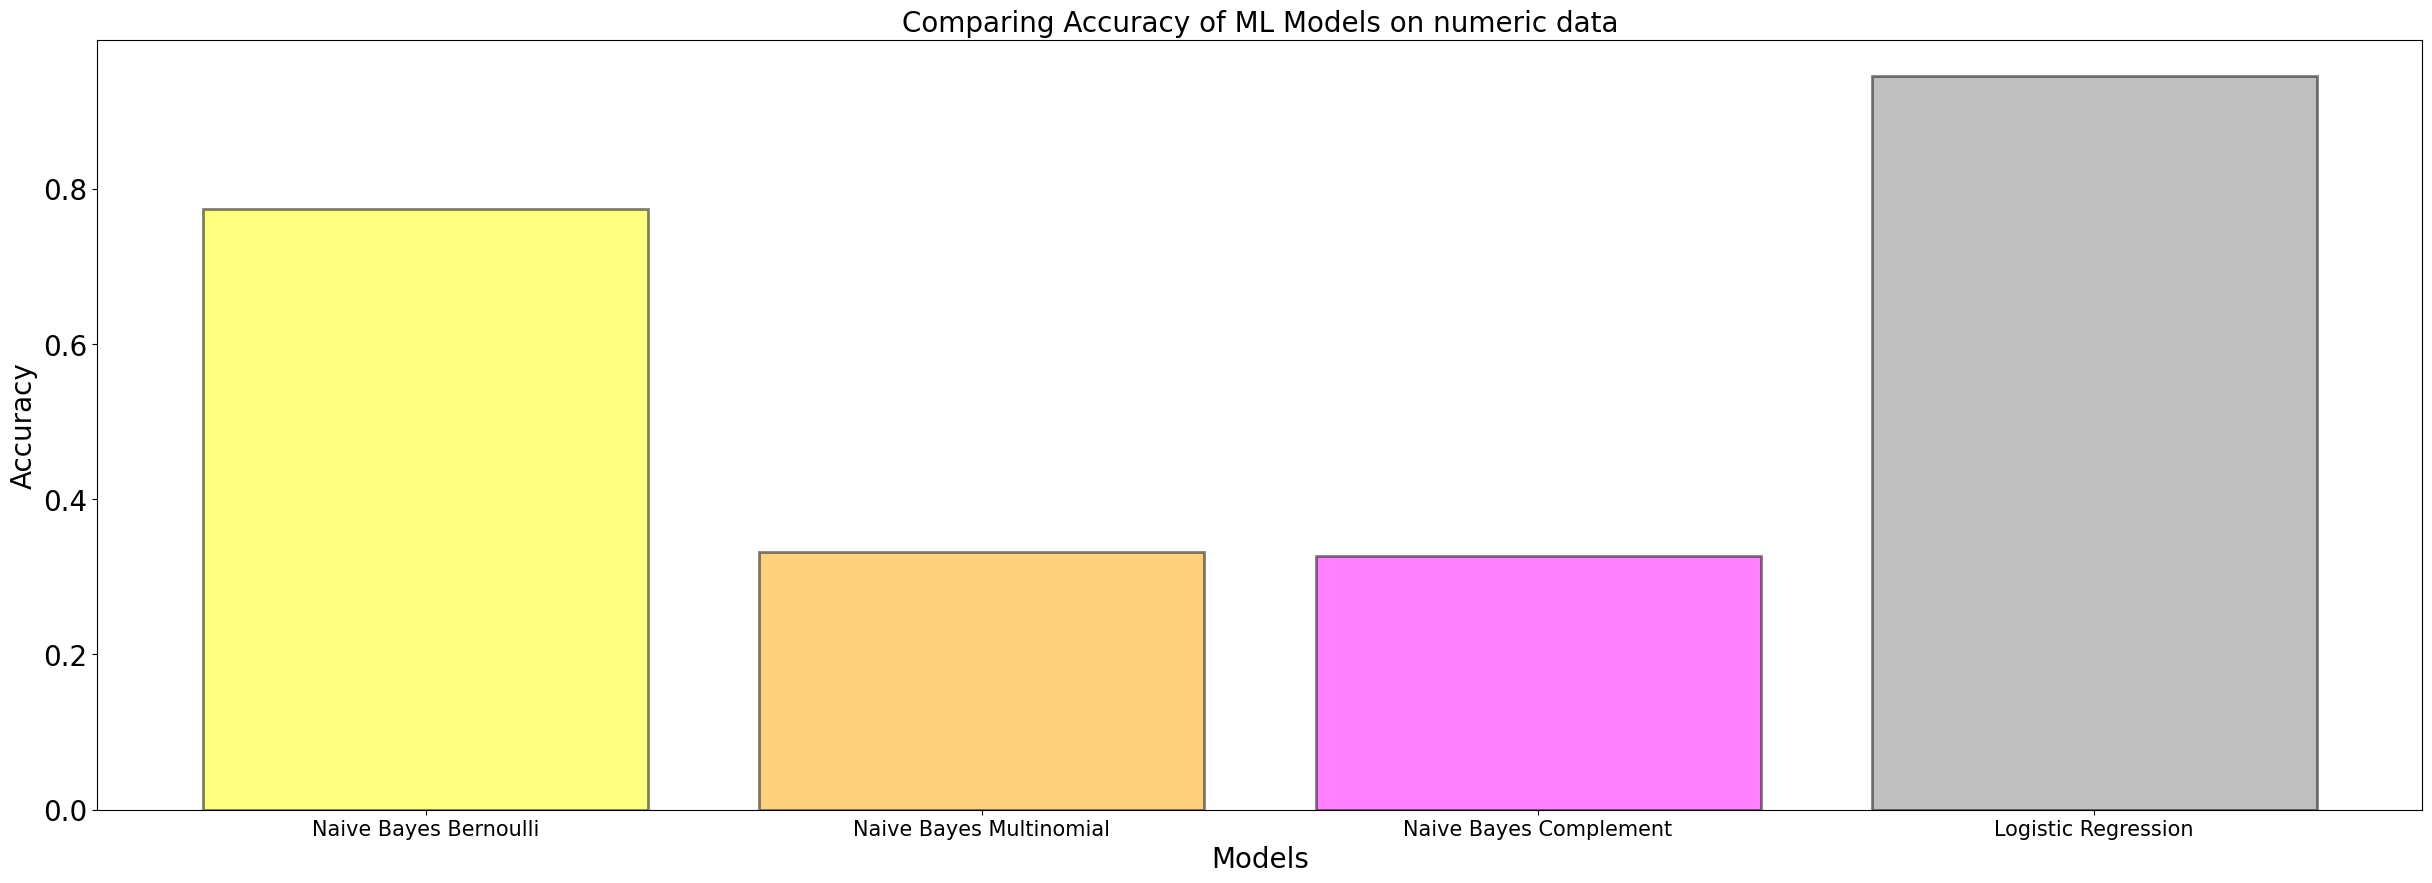

In [112]:
#Plotting accuracy of all the models with Bar-Graphs
plt.figure(figsize=(30,10))
plt.title('Comparing Accuracy of ML Models on numeric data',fontsize=20)
colors=['yellow','orange','magenta', 'gray']
plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=20,color='black')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels.keys(),labels.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5);



In [ ]:
# f1 scores not possible because we have 3 classes


# Title + Content Data

# Create X and Y (only title and text)
# X_train_text_df6_tfidf, 
# X_test_text_df6_tfidf, 
# Y_train_df6, 
# Y_test_df6 (uppercase letters)


In [64]:
# DEFINE X and Y
X_df6 = df6.drop("label", axis=1)
Y_df6 = df6["label"]


In [65]:
X_df6.columns = X_df6.columns.astype(str)

In [66]:
X_df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85051 entries, 0 to 106709
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        85051 non-null  object 
 1   source                    85051 non-null  object 
 2   title                     85051 non-null  object 
 3   content                   85051 non-null  object 
 4   url                       85051 non-null  object 
 5   published_utc             85051 non-null  int64  
 6   year                      85051 non-null  int64  
 7   month                     85051 non-null  int64  
 8   dayofyear                 85051 non-null  int64  
 9   dayofthemonth             85051 non-null  int64  
 10  weekday                   85051 non-null  int64  
 11  weekend                   85051 non-null  int32  
 12  factuality                85051 non-null  float64
 13  questionable-source       85051 non-null  float64
 14  consp

In [67]:
X_df6.isnull().sum()

id                          0
source                      0
title                       0
content                     0
url                         0
published_utc               0
year                        0
month                       0
dayofyear                   0
dayofthemonth               0
weekday                     0
weekend                     0
factuality                  0
questionable-source         0
conspiracy-pseudoscience    0
pro-science                 0
word_count_content          0
word_count_title            0
tokenized_content           0
tok_content_length          0
tokenized_title             0
tok_title_length            0
nb_character_content        0
nb_character_title          0
Australia                   0
Bulgaria                    0
Canada                      0
Cyprus                      0
France                      0
Germany                     0
Ireland                     0
Israel                      0
Japan                       0
Kenya     

In [68]:
Y_df6.info()

<class 'pandas.core.series.Series'>
Int64Index: 85051 entries, 0 to 106709
Series name: label
Non-Null Count  Dtype  
--------------  -----  
85051 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [69]:
Y_df6.isnull().sum()

0

## Create Train / Test Datasets

In [70]:
from sklearn.model_selection import train_test_split

X_train_df6, X_test_df6, Y_train_df6, Y_test_df6 = train_test_split(X_df6, Y_df6, test_size=0.2)


# Vectorizing

### TFIDF Vectorizing
### USING CONTENT_CLEANED AND TITLE ONLY


In [71]:
# VECTORIZING
# TAKES 2 MINUTES

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix

vectorizer1_df6 = TfidfVectorizer()
vectorizer2_df6 = TfidfVectorizer()

vectorizer1_df6.fit(X_train_df6['content'])
vectorizer2_df6.fit(X_train_df6['title'])


TfidfVectorizer()

In [72]:
# TAKES 2 MINUTES

X_train_content_df6_tfidf = vectorizer1_df6.transform(X_train_df6['content'])
X_train_title_df6_tfidf = vectorizer2_df6.transform(X_train_df6['title'])
X_test_content_df6_tfidf = vectorizer1_df6.transform(X_test_df6['content'])
X_test_title_df6_tfidf = vectorizer2_df6.transform(X_test_df6['title'])


In [73]:
X_train_text_df6_tfidf = hstack([X_train_content_df6_tfidf, X_train_title_df6_tfidf])
X_test_text_df6_tfidf = hstack([X_test_content_df6_tfidf, X_test_title_df6_tfidf])


In [74]:
X_train_text_df6_tfidf

<68040x269091 sparse matrix of type '<class 'numpy.float64'>'
	with 17401587 stored elements in Compressed Sparse Row format>

In [75]:
X_train_text_df6_tfidf.shape

(68040, 269091)

In [76]:
X_test_text_df6_tfidf

<17011x269091 sparse matrix of type '<class 'numpy.float64'>'
	with 4311425 stored elements in Compressed Sparse Row format>

In [77]:
X_test_text_df6_tfidf.shape

(17011, 269091)

In [78]:
Y_train_df6

64503    2.0
8949     0.0
11730    0.0
32890    1.0
99290    0.0
        ... 
96027    0.0
75530    2.0
67271    0.0
66181    0.0
39654    2.0
Name: label, Length: 68040, dtype: float64

In [79]:
Y_test_df6

16657    0.0
36065    0.0
67039    0.0
22361    0.0
47443    2.0
        ... 
31263    1.0
38694    1.0
55305    1.0
88626    2.0
82095    0.0
Name: label, Length: 17011, dtype: float64

In [ ]:
## MODELS FOR STAGE 1 (Basic Models):
# 1) Naive Bayes Bernoulli
# 2) Naive Bayes Multinomial
# 3) Naive Bayes Complement
# 4) Logistic Regression


# 1 Naive Bayes Bernoulli on text data df6

In [130]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [131]:
# Create a Bernoulli Naive Bayes classifier
clf_Bern_df6_tfidf = BernoulliNB()


In [132]:
# Train the classifier
clf_Bern_df6_tfidf.fit(X_train_text_df6_tfidf, Y_train_df6)


BernoulliNB()

In [133]:
# Make predictions on the test set
y_pred_NB_Bern_df6_tfidf = clf_Bern_df6_tfidf.predict(X_test_text_df6_tfidf)


In [134]:
# Evaluate the model with accuracy
accuracy_NB_Bern_df6_tfidf = accuracy_score(Y_test_df6, y_pred_NB_Bern_df6_tfidf)
print("Accuracy:", accuracy_NB_Bern_df6_tfidf)

# 0.5459


Accuracy: 0.5459408617953089


In [135]:
# Evaluate Model with confusion matrix 
from sklearn.metrics import confusion_matrix 

cf_matrix_NB_Bern_df6_tfidf = confusion_matrix(Y_test_df6, y_pred_NB_Bern_df6_tfidf)
print("Confusion Matrix:\n",  cf_matrix_NB_Bern_df6_tfidf)


Confusion Matrix:
 [[3341 2293 1779]
 [ 777 3637  834]
 [1075  966 2309]]


In [136]:
# Evaluate model with classification report
from sklearn.metrics import classification_report 

print("Naive Bayes Bernoulli df6 tfidf classification report:\n", classification_report (Y_test_df6, y_pred_NB_Bern_df6_tfidf))


Naive Bayes Bernoulli df6 tfidf classification report:
               precision    recall  f1-score   support

         0.0       0.64      0.45      0.53      7413
         1.0       0.53      0.69      0.60      5248
         2.0       0.47      0.53      0.50      4350

    accuracy                           0.55     17011
   macro avg       0.55      0.56      0.54     17011
weighted avg       0.56      0.55      0.54     17011



# 2 MULTINOMIAL NAIVE BAYES on text data df6


In [137]:
from sklearn.naive_bayes import MultinomialNB

In [138]:
from sklearn.naive_bayes import MultinomialNB
clf_mult_df6_tfidf = MultinomialNB()


In [139]:
# fit the model
clf_mult_df6_tfidf.fit(X_train_text_df6_tfidf, Y_train_df6)


MultinomialNB()

In [140]:
y_pred_NB_Mult_df6_tfidf = clf_mult_df6_tfidf.predict(X_test_text_df6_tfidf)


In [141]:
# get accuracy
accuracy_NB_Mult_df6_tfidf = clf_mult_df6_tfidf.score(X_test_text_df6_tfidf, Y_test_df6)
accuracy_NB_Mult_df6_tfidf

# 0.59


0.592910469696079

In [142]:
# get confusion matrix
pd.crosstab(Y_test_df6, y_pred_NB_Mult_df6_tfidf, rownames=["true"], colnames=["predict"])


predict,0.0,1.0,2.0
real,,,
0.0,7038,152,223
1.0,3067,2117,64
2.0,3272,147,931


In [143]:
from sklearn.metrics import classification_report 

# get classification report
print("Naive Bayes Multinomial df6 tfidf classification report:\n ", classification_report (Y_test_df6, y_pred_NB_Mult_df6_tfidf))

Naive Bayes Multinomial df6 tfidf classification report:
                precision    recall  f1-score   support

         0.0       0.53      0.95      0.68      7413
         1.0       0.88      0.40      0.55      5248
         2.0       0.76      0.21      0.33      4350

    accuracy                           0.59     17011
   macro avg       0.72      0.52      0.52     17011
weighted avg       0.70      0.59      0.55     17011



In [144]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


In [145]:
# create confusion matrix
cf_matrix_NB_Mult_df6_tfidf = confusion_matrix(Y_test_df6, y_pred_NB_Mult_df6_tfidf)
print(cf_matrix_NB_Mult_df6_tfidf)


[[7038  152  223]
 [3067 2117   64]
 [3272  147  931]]


# 3 COMPLEMENT NAIVE BAYES on text data df6


In [146]:
from sklearn.naive_bayes import ComplementNB
clf_compl_df6_tfidf = ComplementNB()


In [147]:
# fit model
clf_compl_df6_tfidf.fit(X_train_text_df6_tfidf, Y_train_df6)


ComplementNB()

In [148]:
y_pred_NB_Compl_df6_tfidf = clf_compl_df6_tfidf.predict(X_test_text_df6_tfidf)


In [149]:
# get accuracy
accuracy_NB_Compl_df6_tfidf = clf_compl_df6_tfidf.score(X_test_text_df6_tfidf, Y_test_df6)
accuracy_NB_Compl_df6_tfidf

# 0.64

0.6424666392334372

In [150]:
# get confusion matrix
pd.crosstab(Y_test_df6, y_pred_NB_Compl_df6_tfidf, rownames=["true"], colnames=["predict"])


predict,0.0,1.0,2.0
real,,,
0.0,6018,651,744
1.0,1777,3169,302
2.0,2185,423,1742


In [151]:
from sklearn.metrics import classification_report 

# get classification report
print("Naive Bayes Complement df6 tfidf classification report:\n ", classification_report (Y_test_df6, y_pred_NB_Compl_df6_tfidf))


Naive Bayes Complement df6 tfidf classification report:
                precision    recall  f1-score   support

         0.0       0.60      0.81      0.69      7413
         1.0       0.75      0.60      0.67      5248
         2.0       0.62      0.40      0.49      4350

    accuracy                           0.64     17011
   macro avg       0.66      0.61      0.62     17011
weighted avg       0.65      0.64      0.63     17011



In [152]:
# create confusion matrix
cf_matrix_Compl_df6_tfidf = confusion_matrix(Y_test_df6, y_pred_NB_Compl_df6_tfidf)
print(cf_matrix_Compl_df6_tfidf)


[[6018  651  744]
 [1777 3169  302]
 [2185  423 1742]]


# 4 CREATE LOGISTIC REGRESSION MODEL ON TEXT DATA df6


In [119]:
# Step 3: Instantiate model 
from sklearn.linear_model import LogisticRegression

clf_LogReg_df6_tfidf = LogisticRegression(C=1.0)
# clf_LogReg_df6_tfidf = LogisticRegression(C=1.0, class_wight="balanced")
# clf_LogReg_df6_tfidf = LogisticRegression(C=1.0, penalty="elasticnet")


In [120]:
# Step 4: Fit the model on the training dataset
clf_LogReg_df6_tfidf.fit(X_train_text_df6_tfidf, Y_train_df6)


C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [121]:
y_pred_LogReg_df6_tfidf = clf_LogReg_df6_tfidf.predict(X_test_text_df6_tfidf)


In [153]:
# get accuracy
accuracy_LogReg_df6_tfidf = clf_LogReg_df6_tfidf.score(X_test_text_df6_tfidf, Y_test_df6)
accuracy_LogReg_df6_tfidf

# 0.721

0.7210040561989302

In [154]:
# get confusion matrix
pd.crosstab(Y_test_df6, y_pred_LogReg_df6_tfidf, rownames=["true"], colnames=["predict"])


predict,0.0,1.0,2.0
real,,,
0.0,5763,789,861
1.0,906,3984,358
2.0,1314,518,2518


In [155]:
from sklearn.metrics import classification_report 

# get classification report
print("Logistic Regression df6 tfidf classification report:\n ", classification_report (Y_test_df6, y_pred_LogReg_df6_tfidf))


Logistic Regression df6 tfidf classification report:
                precision    recall  f1-score   support

         0.0       0.72      0.78      0.75      7413
         1.0       0.75      0.76      0.76      5248
         2.0       0.67      0.58      0.62      4350

    accuracy                           0.72     17011
   macro avg       0.72      0.71      0.71     17011
weighted avg       0.72      0.72      0.72     17011



In [156]:
# create confusion matrix
cf_matrix_LogReg_df6_tfidf = confusion_matrix(Y_test_df6, y_pred_LogReg_df6_tfidf)
print(cf_matrix_LogReg_df6_tfidf)


[[5763  789  861]
 [ 906 3984  358]
 [1314  518 2518]]


# COMPARE MODELS ON TEXT DATA ONLY df6


In [157]:
print("Naive Bayes Bernoulli accuracy score df6 tfidf:", accuracy_NB_Bern_df6_tfidf)
print("Naive Bayes Multinomial accuracy score df6 tfidf:", accuracy_NB_Mult_df6_tfidf)
print("Naive Bayes Complement accuracy score df6 tfidf:", accuracy_NB_Compl_df6_tfidf)
print("Logistic Regression accuracy score df6 tfidf:", accuracy_LogReg_df6_tfidf)


Naive Bayes Bernoulli accuracy score df6 tfidf: 0.5459408617953089
Naive Bayes Multinomial accuracy score df6 tfidf: 0.592910469696079
Naive Bayes Complement accuracy score df6 tfidf: 0.6424666392334372
Logistic Regression accuracy score df6 tfidf: 0.7210040561989302


In [158]:
#Creating the Dictionary with model name as key adn accuracy as key-value
labels={'Naive Bayes Bernoulli':accuracy_NB_Bern_df6_tfidf,
        'Naive Bayes Multinomial':accuracy_NB_Mult_df6_tfidf,
        'Naive Bayes Complement':accuracy_NB_Compl_df6_tfidf,
        'Logistic Regression':accuracy_LogReg_df6_tfidf}


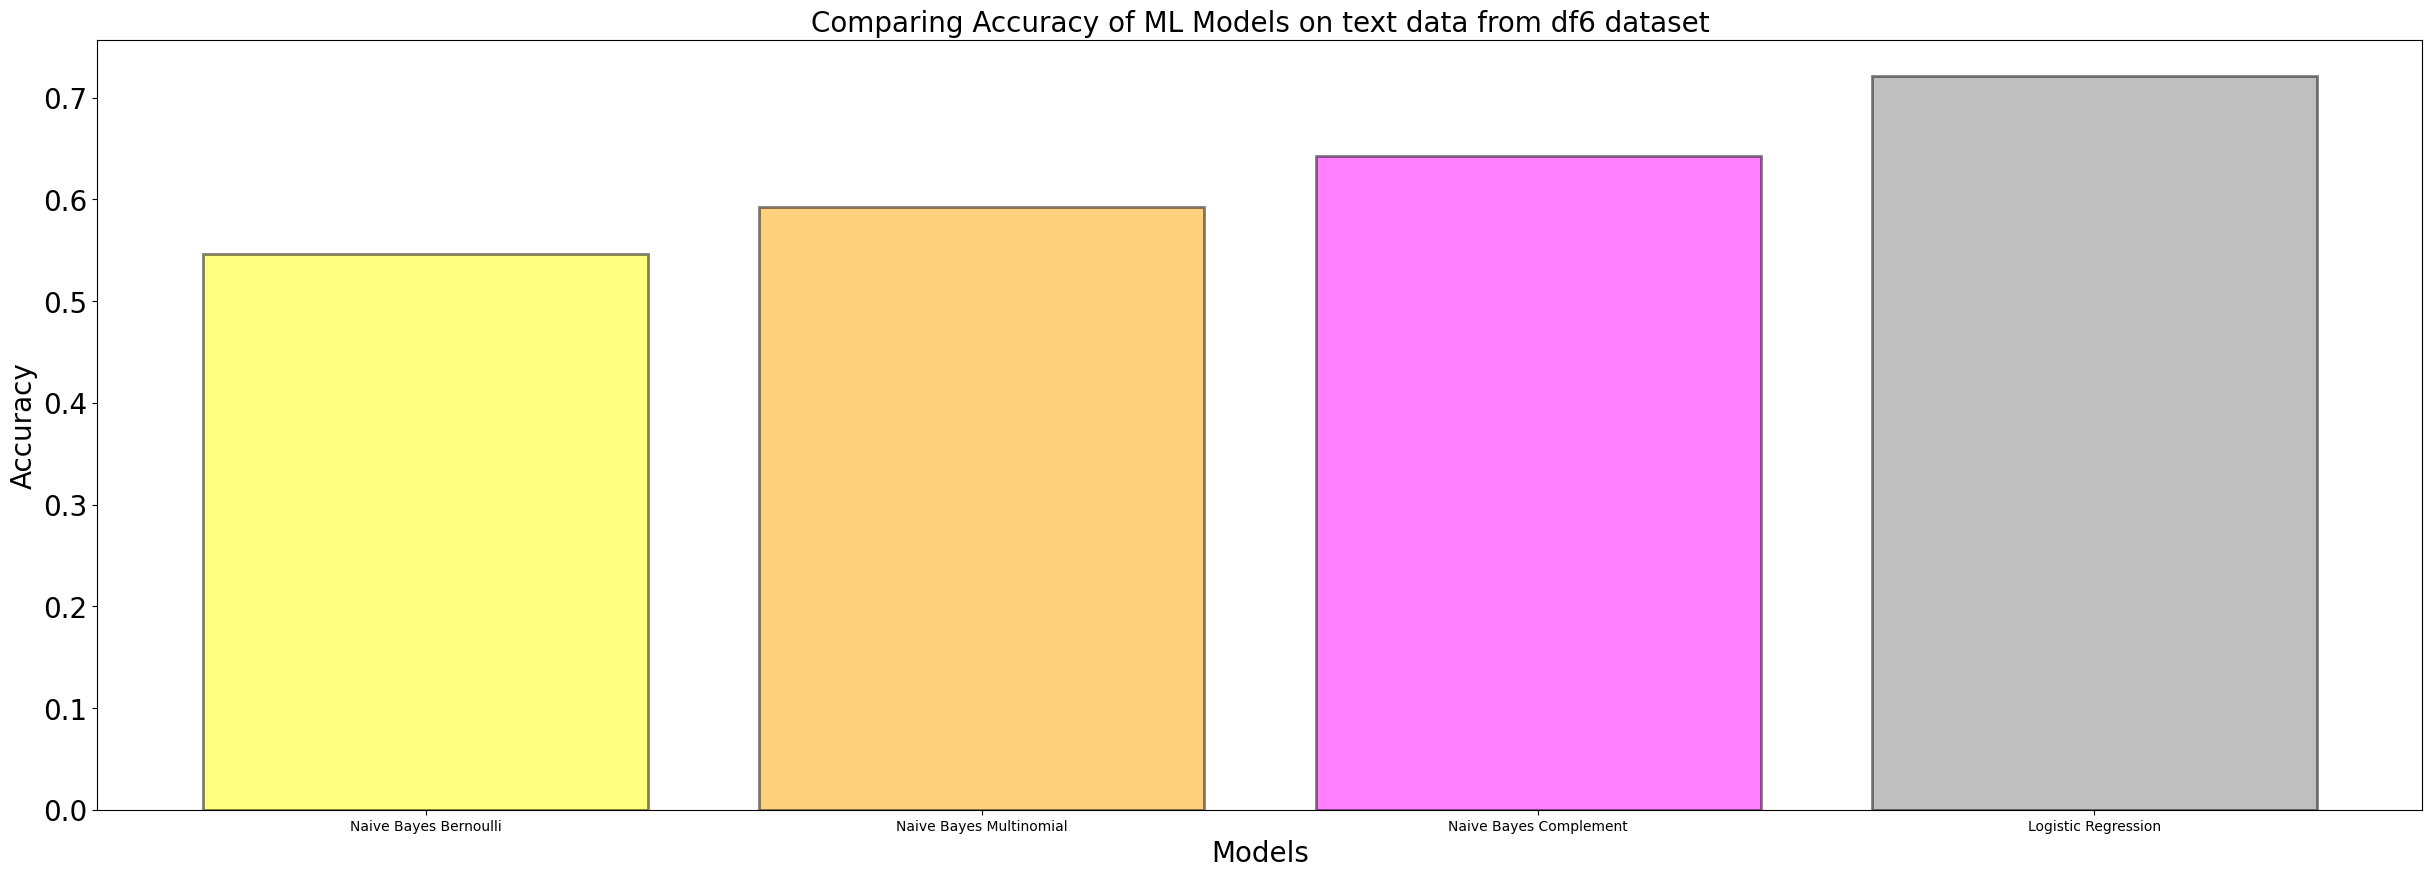

In [159]:
#Plotting accuracy of all the models with Bar-Graphs
plt.figure(figsize=(30,10))
plt.title('Comparing Accuracy of ML Models on text data from df6 dataset',fontsize=20)
colors=['yellow','orange','magenta', 'gray']
plt.xticks(fontsize=10,color='black')
plt.yticks(fontsize=20,color='black')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels.keys(),labels.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5);



In [ ]:
# f1 scores not possible because we have 3 classes
